# Step 1 - Open the data file and study the general information  

**General information**

This data analysis is for the online store Ice, which sells video games all over the world.
User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.

in this analysis I intend to identify patterns that determine whether a game succeeds or not.
This will allow us to spot potential big winners and plan advertising campaigns.

In this analysis we are going to work with data going back to 2016 for a planned campaign for 2017.


*The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


**Libraries, Data sets and overview:**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats 
import math
from functools import reduce
import matplotlib.pyplot as plt
from scipy.stats import levene
from scipy import stats
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

**data:**

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:/Users/jenya/Desktop/practicum/games.csv')

In [3]:
print(data.describe(include='all'))
print()
print(data.info())
print()
print(data.head())

                               Name Platform  Year_of_Release   Genre  \
count                         16713    16715     16446.000000   16713   
unique                        11559       31              NaN      12   
top     Need for Speed: Most Wanted      PS2              NaN  Action   
freq                             12     2161              NaN    3369   
mean                            NaN      NaN      2006.484616     NaN   
std                             NaN      NaN         5.877050     NaN   
min                             NaN      NaN      1980.000000     NaN   
25%                             NaN      NaN      2003.000000     NaN   
50%                             NaN      NaN      2007.000000     NaN   
75%                             NaN      NaN      2010.000000     NaN   
max                             NaN      NaN      2016.000000     NaN   

            NA_sales      EU_sales      JP_sales   Other_sales  Critic_Score  \
count   16715.000000  16715.000000  16715.0

**Overview**

—Name - Name of the Game

—Platform - platform of the game

—Year_of_Release - the year the game was released

—Genre - the genre ofthe game

—NA_sales (North American sales in USD million)

—EU_sales (sales in Europe in USD million)

—JP_sales (sales in Japan in USD million)

—Other_sales (sales in other countries in USD million)

—Critic_Score (maximum of 100)

—User_Score (maximum of 10)

—Rating (ESRB)

**Regarding the dataset**

There are missing values we are able to change or ommit without effecting the dataset.

we need to change the type of certain column in order to continue with our analysis. For this part we need to replace specific string values in the columns.



# Step 2 - Preparing the data

**In this step we intnend to:**

- Replace the column names (make them lowercase).


- If necessary we will decide how to deal with missing values.

Explain why you filled in the missing values as you did or why you decided to leave them blank.

Why do you think the values are missing? Give possible reasons.

Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

- Convert the data to the required types, describe the columns where the data types have been changed and why.

- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

----------------------

- Replace the column names (make them lowercase):

In [4]:
data.columns = data.columns.str.lower()

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


-------------------

- Now we will see with how much missing values we are deling with:

In [5]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

we have the same amount of missing values in [name] and [genre], if there missing symmetrically we can ommit them as we cant restore any of them both.

In [6]:
data[data['name'].isnull() | data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


they values are the same so we can remove them without affecting the dataset at all. 

In [7]:
data.drop(labels=[659, 14244], inplace=True)

In [8]:
data.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

-now we are left with missing values in [year_of_release] , [critic score] , [user score] and [rating].

We cant change values to 0 or mean/median in [critic score] , [user score] and [rating] as we cant really determine such parameters. So we have to leave them as they are.

However, missing values in [year_of_release] seems to be small if compared to the other column that contain missing values and we can remove those values without largely affecting the dataset.   

In [9]:
data = data[data['year_of_release'].notna()]

In [10]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

- Dealing with TBD values in [user_score]:

we need to pay attention to the abbreviation TBD (to be determined). This values can indicate a pettern or tell us something about the data. we will check their distribution throught the eyars.

In [11]:
data[data.user_score =='tbd']['year_of_release'].value_counts()


2009.0    405
2010.0    331
2008.0    326
2011.0    217
2007.0    192
2002.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

we see here that we have this value in many differet years so it doesnt indicate any pattern and Such values are besically the same as null values so we can removoe them or change them to null values in order to mske our data less complex and more flexible.

In [12]:
data.loc[data['user_score'] =='tbd', 'user_score'] = np.nan
data['user_score'].isnull().sum()

8981

--------------------

- lets check for zero value in the data columns:

In [13]:
def zero(data):
    for row in data:
        print(row,len(data[data[row]== 0]))

In [14]:
zero(data)

name 0
platform 0
year_of_release 0
genre 0
na_sales 4449
eu_sales 5766
jp_sales 10300
other_sales 6492
critic_score 0
user_score 0
rating 0


-the only zero values in the data are in the sales columns. This is logical because we can expect that certain games or platforms arent avalible worldwide.

-----------------------

In [15]:
data['year_of_release'].fillna(value=0)

data['year_of_release'].isnull().sum()


0

**Missing values summary**

This is the dataset we are left with after dealing with missing values. the only missin values we allow to stay are rateing related as we cant replace them with other values because we dont have the additional information for such desicions.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


-------------------

- Convert the data to the required types:

We need to change [year_of_release] column to datetime type.

In [17]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = data['year_of_release'].dt.year

data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int64

we need to change [user_score] column to a float type

In [18]:
data['user_score'] = data['user_score'].astype('float')
data['user_score'].isnull().sum()

8981

Here we changed the NaN value in the [rating] column to 'unknown'.

In [19]:
data['rating'].isnull().sum()

6676

In [20]:
data['rating']=data['rating'].fillna(value='unknown')

In [21]:
data['rating'].value_counts().sum()

16444

------------------------

- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

we need to create a new column with the total value of sales for each game

In [22]:
data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**step overview**

In this step we: 

Replaced the column names (make them lowercase).

dealt with missing values in the columns [name],[genre] and [year_of_release].
we didnt change or ommit any missing values in the score column because of their large amount and our innability to replace the missing values.

We changed the TBD value to NaN in the columns [year_of_release] and [user_score] in order to remove all the string from those columns and change the types of the columns.

We cteated a new column that calculates the total sales of each game, we called it [total_sales].


# Step 3 - Analyze the data

**In this step we intnend to:**

- Look at how many games were released in different years. Is the data for every period significant?


- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

Work only with the data that you've decided is relevant. Disregard the data for previous years.
Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Keeping your conclusions in mind, compare the sales of the same games on other platforms

- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

------------------------

- Look at how many games were released in different years. Is the data for every period significant?

In [23]:
games_per_year = data[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='year_of_release',ascending=False).reset_index()
games_per_year

,year_of_release,name
0,2016,502
1,2015,606
2,2014,581
3,2013,544
4,2012,653
5,2011,1136
6,2010,1255
7,2009,1426
8,2008,1427
9,2007,1197


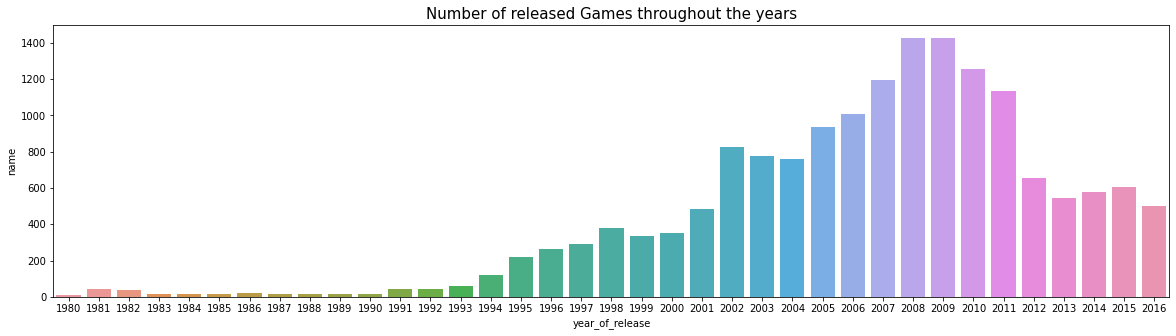

In [24]:
fig, axes = plt.subplots(figsize=(20, 5))
axes.set_title("Number of released Games throughout the years", fontdict={'size':15})
sns.barplot(data=games_per_year,x='year_of_release',y='name',ax=axes)
plt.show()

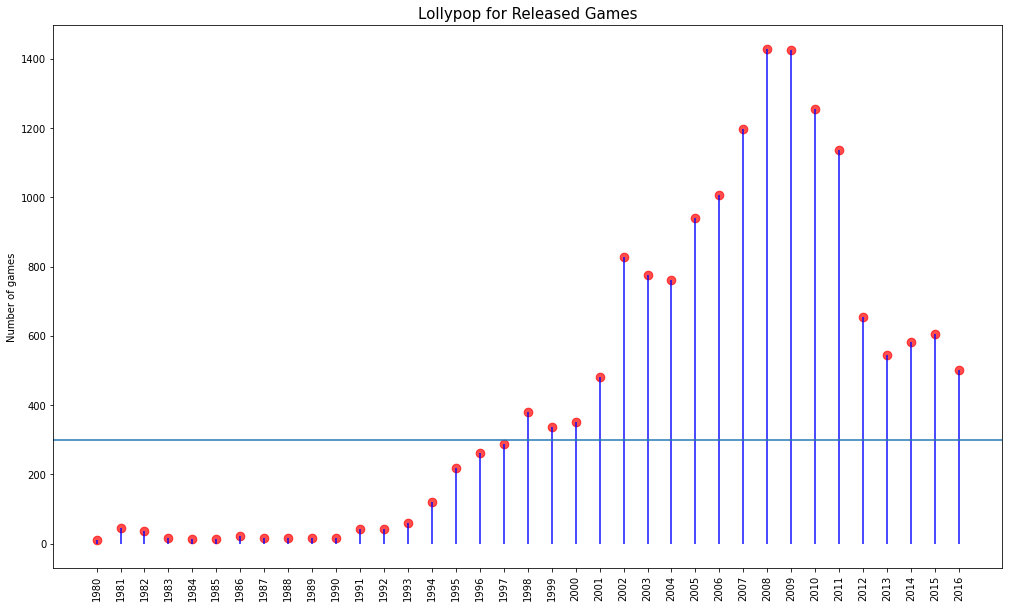

In [25]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=games_per_year.year_of_release, ymin=0, ymax=games_per_year.name, color='blue', alpha=0.7, linewidth=2)
ax.scatter(x=games_per_year.year_of_release,y=games_per_year.name, s=75, color='red',alpha=0.7)
ax.set_title("Lollypop for Released Games", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(games_per_year.year_of_release)
ax.set_xticklabels(games_per_year.year_of_release,rotation=90)
ax.axhline(y=300)
plt.show()

**observations**

It seems that in 2008 and 2009 there was the biggest amount of games, 1427 and 1426, that was ever made by 2016.
 
 (fallout 3 and GTA IV came out 2008 and are personsal favorites of mine)
 
Data started growing noticably at 1994, before that there were less that annual 100 games and after 1994 that number of games that were released annualy started jumping and at times doubling themselves each year.
 
After 2008, there was a declining trend of game releases per year that stabilized beetween 500-600 games in the last years of 2013 to 2016. 

------------------------

**plan**
- Look at how sales varied from platform to platform.
- Choose the platforms with the greatest total sales and build a distribution based on data for each year.
- Find platforms that used to be popular but now have zero sales.
- How long does it generally take for new platforms to appear and old ones to fade?

In [26]:
platform_total_sales = data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
platform_total_sales

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


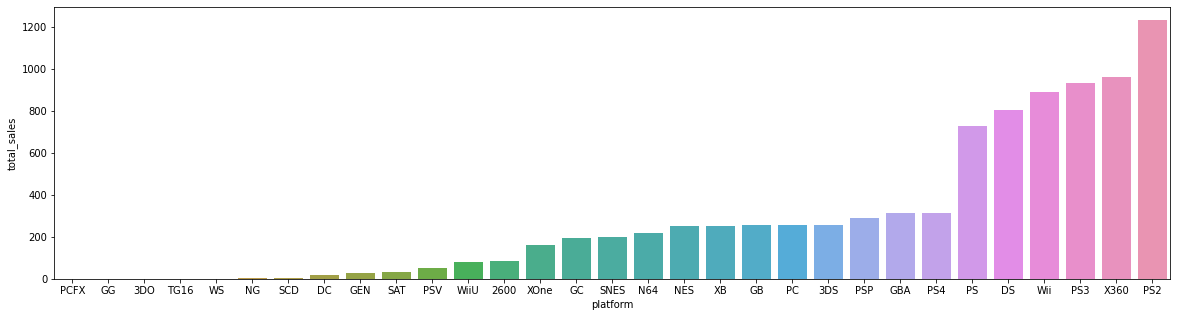

In [27]:
fig, axes = plt.subplots(figsize=(20, 5))
sns.barplot(data=platform_total_sales,x='platform',y='total_sales',ax=axes)
plt.show()

As we see in the bar graph the platforms with the highest sales are PS2 and X360. 

now after we chose the platforms with the greatest total sales we build a distribution graph based on data for each year.


In [28]:
ps2_data = data[data['platform']=='PS2']
x360_data =  data[data['platform']=='X360']
ps3_data =  data[data['platform']=='PS3']
wii_data =  data[data['platform']=='Wii']

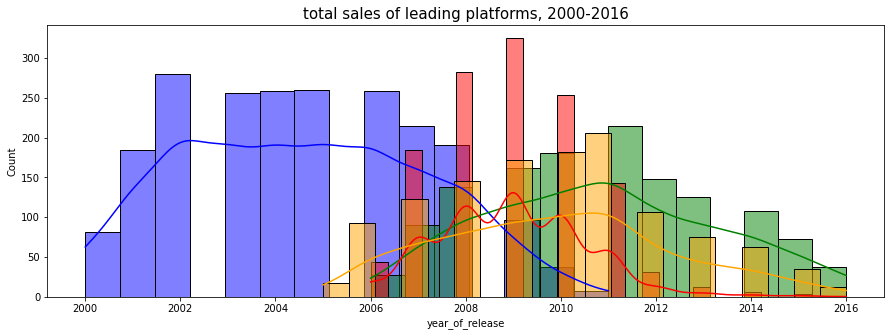

In [29]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.set_title("total sales of leading platforms, 2000-2016", fontdict={'size':15})
print('')
sns.histplot(data=ps2_data,x='year_of_release', kde=True,color='blue')
sns.histplot(data=ps3_data,x='year_of_release', kde=True,color='green')
sns.histplot(data=wii_data,x='year_of_release', kde=True,color='red')
sns.histplot(data=x360_data,x='year_of_release', kde=True,color='orange')
plt.show()

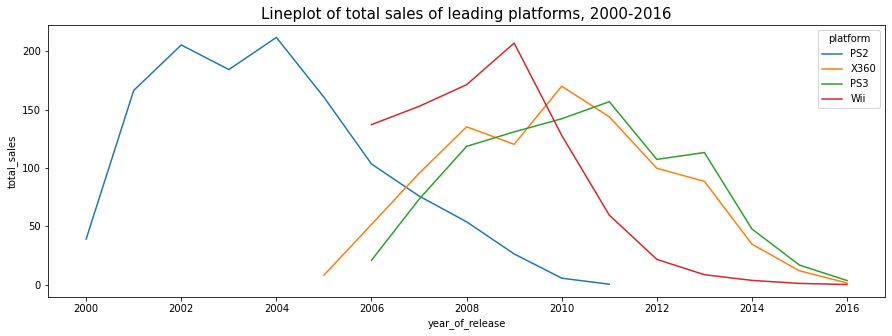

In [30]:
top_platforms = ["PS2", "X360", "PS3", "Wii"]
#Aggregate sales per year and platform 
fig, axes = plt.subplots(figsize=(15, 5))
axes.set_title("Lineplot of total sales of leading platforms, 2000-2016", fontdict={'size':15})
sales = (data[data.platform.isin(top_platforms)].groupby(['year_of_release','platform']).total_sales.sum() .reset_index())
sns.lineplot(data=sales, x="year_of_release", y='total_sales', hue="platform");

-----------------

- How long does it generally take for new platforms to appear and old ones to fade?

In all of the graphs of our most profitble platforms there is a visible distribution of ascending and gradually descending in the period of 10 years. The distibuiton of PS2 seems to b the most stable troughout the years as it reached a plateau between 02 to 06 indicating it was the most popular platform of that time, right by the time other leading platforms started rising.

By 2005, XBOX-360 and then at 2006 Wii and PS3 came out and started gaining popularity as sales of PS2 started going down. By 2010 XBOX-360 sales were declining aswell hinting that there were another platform that was gaining popularity, the PS3. 

Here we see that the life time of our leading platforms are about 10 years and it reaches its peak in terms of profit in its midlife, about 5-6 yers, so we can filter the data to a minimum year of 2013 if we want to target any platform that are on the rise and could be profitable in 2017.  

In [31]:
platform_lifetime = data.groupby(['platform', 'year_of_release'], as_index=False)['total_sales'].sum().sort_values(by='year_of_release')
platform_lifetime = platform_lifetime.groupby(['platform'])['year_of_release'].agg(['min', 'max']).reset_index()

In [32]:
platform_lifetime['lifetime']=platform_lifetime['max']-platform_lifetime['min']
platform_lifetime.sort_values(by='max',ascending=False)

,platform,min,max,lifetime
30,XOne,2013,2016,3
2,3DS,2011,2016,5
28,X360,2005,2016,11
27,WiiU,2012,2016,4
26,Wii,2006,2016,10
20,PSV,2011,2016,5
13,PC,1985,2016,31
18,PS4,2013,2016,3
17,PS3,2006,2016,10
19,PSP,2004,2015,11


In [33]:
platform_lifetime['lifetime'].median()

6.0

- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

The median lifetime of a platform is 6 years but as we seen in our data it takes 4 to 6 years to reach its profit limit for leading platforms.

We will exclude platfoms that have outdated their profit limit and focus from now on only on platforms that can still be on the rise by 2017. 

That means that we exclude all data below 2013.

In [34]:

data_filtered=data[data['year_of_release'] >= 2013]

In [35]:
data_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.


In [36]:
data_filtered[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()

,platform,total_sales
0,DS,1.54
1,PSP,3.50
2,Wii,13.66
3,PSV,32.99
4,PC,39.43
5,WiiU,64.63
6,X360,136.80
7,3DS,143.25
8,XOne,159.32
9,PS3,181.43


most profitable platform in the years since 2013 is PS4, after that is PS3 and XOne.

In [37]:
xone_data =  data[data['platform']=='XOne']
ps3_data =  data[data['platform']=='PS3']
ps4_data =  data[data['platform']=='PS4']

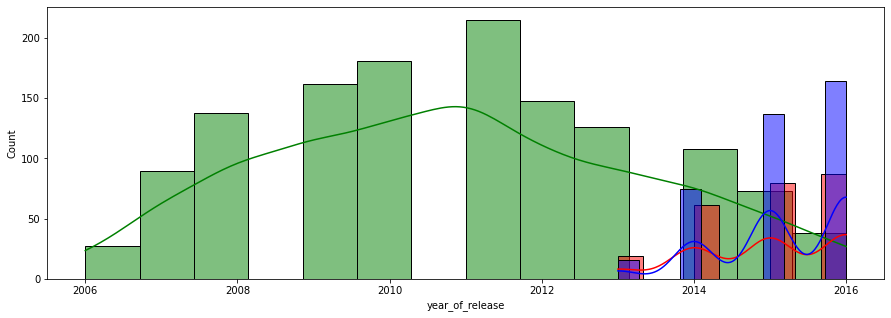

In [38]:
fig, axes = plt.subplots(figsize=(15, 5))
sns.histplot(data=ps3_data,x='year_of_release', kde=True,color='green')
sns.histplot(data=xone_data,x='year_of_release', kde=True,color='red')
sns.histplot(data=ps4_data,x='year_of_release', kde=True,color='blue')
plt.show()

**review**

as we see in the graph PS3 is already declining by 2013 but XOne and PS4 were on the rise, when PS4 is rising sharper than XOne, and are seem to have a good profit potential.


- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? 
- What about average sales on various platforms? Describe your findings.





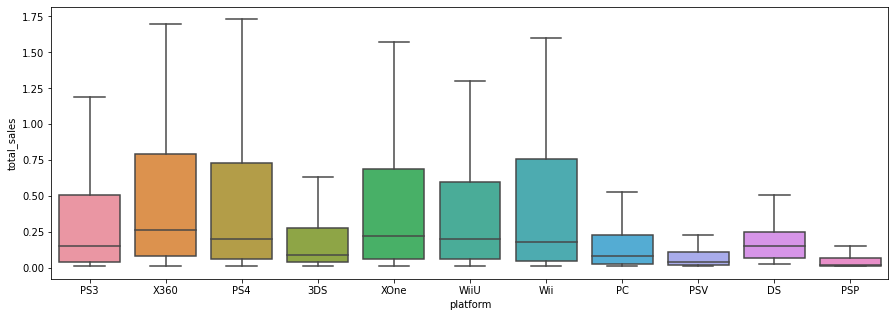

In [39]:
fig, axes = plt.subplots(figsize=(15, 5))
ax=sns.boxplot(x='platform', y='total_sales', data=data_filtered,showfliers = False)
plt.show()

**Observations**

The platform with the highest total sales average is XBOX360 but we know that this platform is gradually declining.
Wii platform exhibits high boundaries but a relatively low average point.
The platform we are iterested in are PS4 and XOne which seem to have smaller boundaries but relatively average points and outliers.

- Overall, the difference in sales are significant and the only profitable platforms that are presented in the boxplot are XBOX360, PS4, XOne and Wii.

- The platforms we are only interested in, PS4 and XOne, do resamble eachother in quartile values over though the average value of XOne is higher then the PS4 average; The quartile range of PS4 is slighlty bogger than XOne.   

---------------------------

**plan**
- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

- Keeping your conclusions in mind, compare the sales of the same games on other platforms

For this part at first we will take a look on the PS4 paltform and how user and professional reviews affect the sales of this platform.

And secondly, we will take a look on the XOne paltform and how user and professional reviews affect the sales of this platform.

- We will do it by presenting a correlation dataframe and a scatterplot graph


In [40]:
xone_data_2013 =  data_filtered[data_filtered['platform']=='XOne']
ps4_data_2013 =  data_filtered[data_filtered['platform']=='PS4']

In [41]:
ps4_scatter = ps4_data_2013[['total_sales','critic_score','user_score']]
xone_scatter =  xone_data_2013[['critic_score','user_score','total_sales']]
ps4_scatter

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7
...,...,...,...
16500,0.01,69.0,7.5
16503,0.01,NaN,NaN
16526,0.01,61.0,7.9
16530,0.01,51.0,5.5


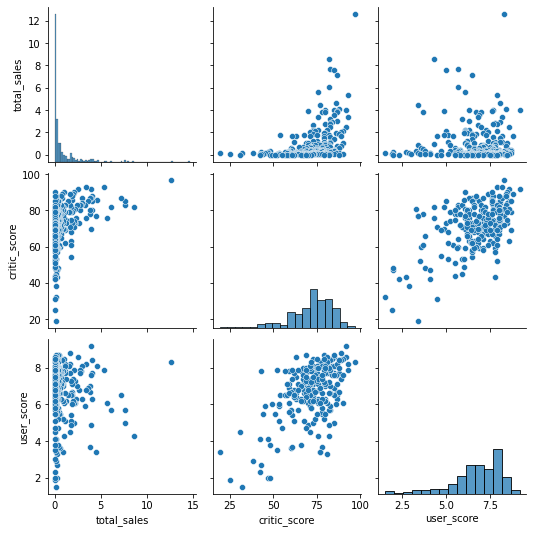

In [42]:
sns.pairplot(ps4_scatter)
plt.show()

In [43]:
ps4_scatter.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


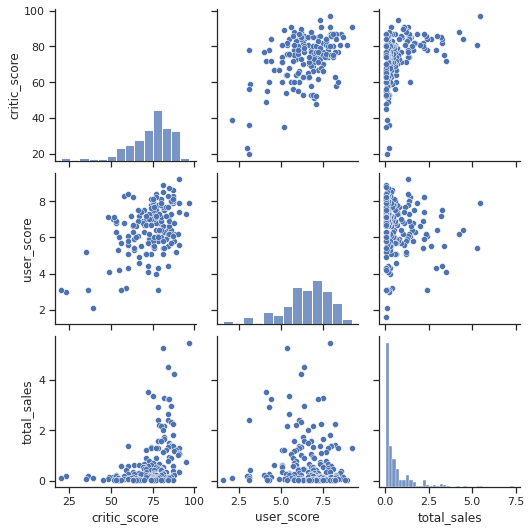

In [44]:
sns.set_theme(style="ticks")
sns.pairplot(xone_scatter)
plt.show()

In [45]:
xone_scatter.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


**observtion**

- There is a correlation between critic_score and total_sales. Which sugget that professional reviews do have an affect on the total sales of games for the platforms we chose.

- User reviews however dont have a correlation at all with the total sales.  

Now lets compare the sales of the same games on the other leading platforms we have on our data- X360

In [46]:
x360_data_2013 =  data_filtered[data_filtered['platform']=='X360']
#wii_data_2013 =  data_filtered[data_filtered['platform']=='Wii']
x360_scatter = x360_data_2013[['total_sales','critic_score','user_score']]
#wii_scatter =  wii_data_2013[['critic_score','user_score','total_sales']]

In [47]:
x360_scatter.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


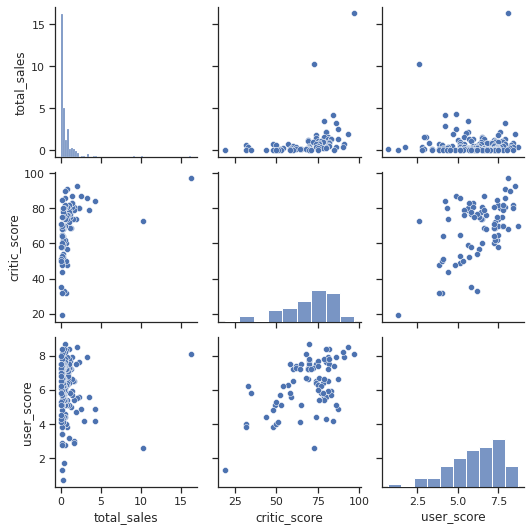

In [48]:
x360_scatter.corr()
sns.pairplot(x360_scatter)
plt.show()

For the X360 we can see also see a correlation between Professional reviews to total sales. 

It shows a pattern for the platforms total sales. 

-----------------

- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [49]:
games_by_genre= data_filtered.groupby('genre')[['name', 'total_sales']].agg({'name': 'count', 'total_sales': 'sum'}).reset_index().sort_values(by='genre')
print(games_by_genre)

           genre  name  total_sales
0         Action   766       321.87
1      Adventure   245        23.64
2       Fighting    80        35.31
3           Misc   155        62.82
4       Platform    74        42.63
5         Puzzle    17         3.17
6         Racing    85        39.89
7   Role-Playing   292       145.89
8        Shooter   187       232.98
9     Simulation    62        21.76
10        Sports   214       150.65
11      Strategy    56        10.08


- A boxplot of the game genres by their total sales.
- We can see the mean and the outliers of eech genre here.

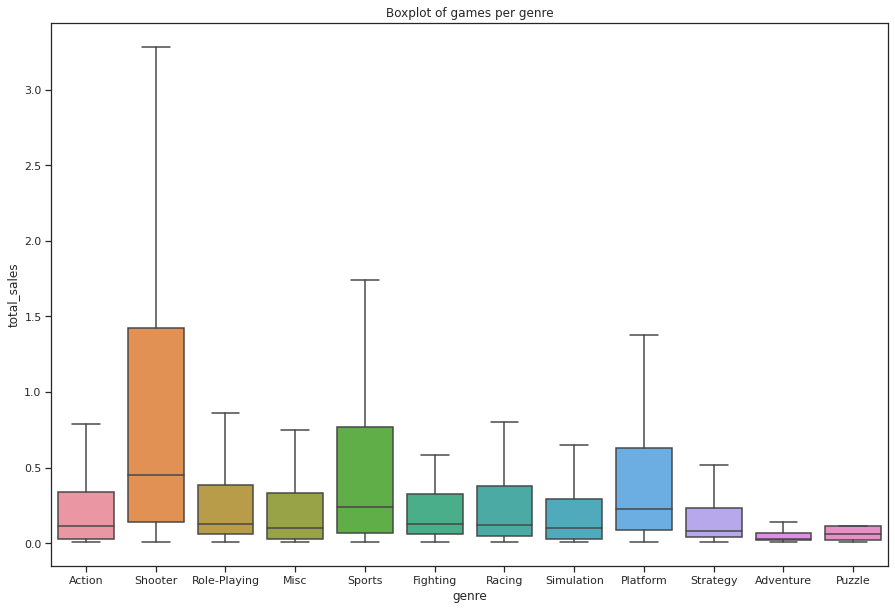

In [50]:
fig, axes = plt.subplots(figsize=(15, 10))
ax=sns.boxplot(x='genre', y='total_sales', data=data_filtered,showfliers = False)
plt.title('Boxplot of games per genre')
plt.show()

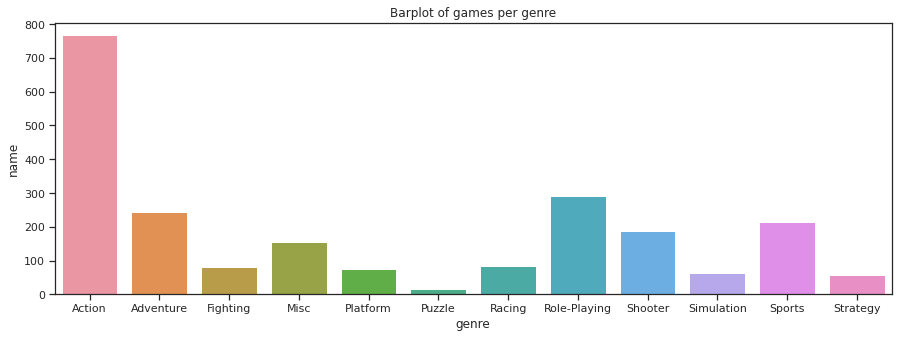

In [51]:
fig, axes = plt.subplots(figsize=(15, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genre", y="name", data=games_by_genre)
plt.title('Barplot of games per genre')
plt.show()

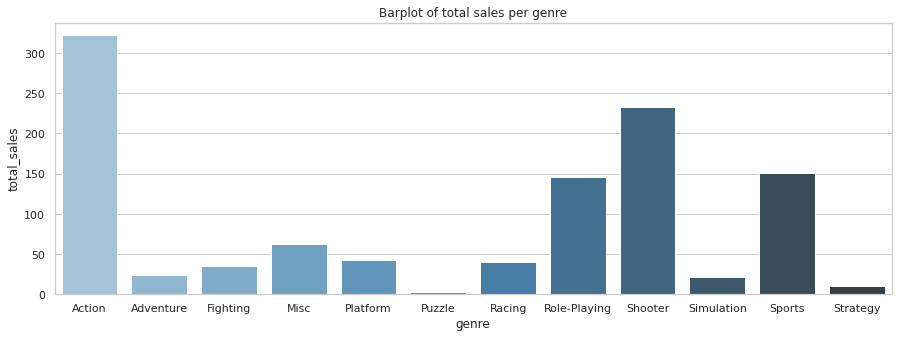

In [52]:
fig, axes = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x="genre", y="total_sales", data=games_by_genre,palette="Blues_d")
plt.title('Barplot of total sales per genre')
plt.show()

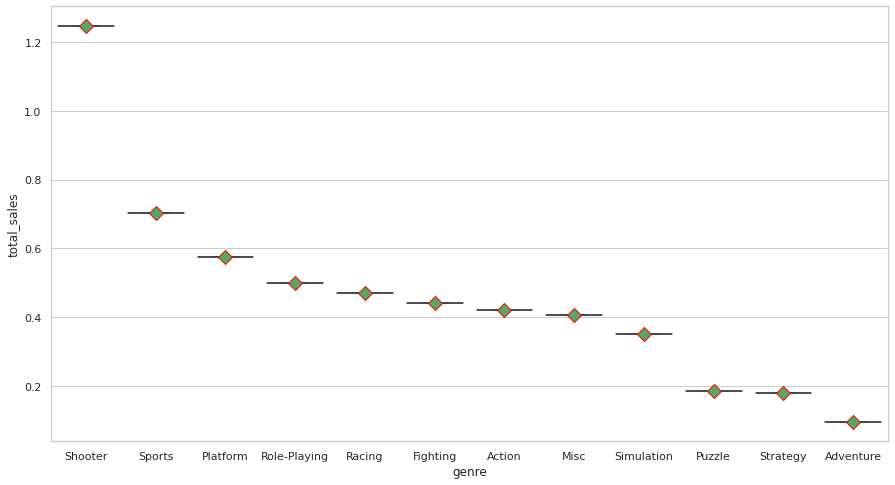

In [53]:
genre_dist = data_filtered.pivot_table(index='genre', values='total_sales', aggfunc=('mean')).sort_values(by=['total_sales'],ascending=False).reset_index()
plt.figure(figsize = (15,8))
sns.boxplot(data = genre_dist, x='genre', y='total_sales', showfliers=False, showmeans=True, meanprops={"marker": "D",
                       "markeredgecolor": "red",
                       "markersize": "10"})
plt.show()

**Observations**

by providing 2 barplots:
- Upper describing number games per genre that was released from 2013 until 2016.

- The bottom describing the total sales per genre fro m2013 until 2016.

Looking at the boxplot:

- The most profitble genre is the Shoter genre regardless of it number of games per year. Secong most profitble genre is Sports. Regardelss the high number of games for the A ction genre this genre is not a profitble as it would seem to be.

We can say that the most popular and profitable genre of games is Action genre in terms of game releases and in total sales.
The second most released game genres were role-playing and adventure but in terms of profit the socond highest is shooter genre that is followed by Sports, eventhough shooter genre is 5th and Sports genre is the 4th in game releases. 

The data observed through these graphs and the Boxplot suggests that the genres sport and Shooter are the most profit potential among the genres as they do not have a high game count but a high profit.

----------------

**Step overview**

In this step on Exploratory data analysis we gathered a good amlint of indormation regarding our data.
We Looked at how many games were released in different years and It seems that in 2008 and 2009 there was the biggest amount of games, 1427 and 1426, that was ever made by 2016.


We noticed that the data started growing noticably at 1994, before that there were less that annual 100 games and after 1994 that number of games that were released annualy started jumping and at times doubling themselves each year.
 After 2008, there was a declining trend of game releases per year that stabilized beetween 500-600 games in the last years of 2013 to 2016. 


In all of the graphs of our platforms there was a visible distribution of ascending and gradually descending in the period of 10 years. For example, PS2 used to be the most popular platform in the early 2000 as its distibuiton seemed to be the most stable troughout the years until it reached a plateau between 02 to 06 and standed as the most popular platform of that time.


By 2005, XBOX-360 came out and then at 2006 Wii and PS3 came out and started gaining popularity. Gradualy, sales of PS2 started going down and by 2010 XBOX-360 sales were now declining and hinting that there were another platform that was gaining popularity, which was the PS3.
Then we saw that the lifetime of our leading platforms are about 10 years and it reaches its peak in terms of profit in its midlife, about 5-6 yers, we knew that the median lifetime of a platform is 6 years but as we seen in our data it takes 4 to 6 years to reach its profit limit for leading platforms. So we filtered the data to a minimum year of 2013 in order to target any platform that are on the rise and could be profitable in 2017.


Afrer we excluded platfoms that have outdated their profit limit in order to focus from now on only on platforms that can still be on the rise by 2017. Overall, the difference in sales was significant and the only profitable platforms that were presented in the data were XBOX360, PS4, XOne and Wii.


The platform with the highest total sales average in the data was XBOX360 but we already know that this platform is gradually declining. contrary, Wii platform exhibits high boundaries but a relatively low average point. The platform we were most iterested in were PS4 and XOne which seemed to have smaller boundaries but relatively average points and outliers.

Overall, the difference in sales were significant and the only profitable platforms that are presented in the boxplot were XBOX360, PS4, XOne and Wii.

The platforms we are only interested in, PS4 and XOne, which resambled eachother troughout the data and in their quartile values. The average value of XOne was higher then the PS4 average but the the quartile range of PS4 is slighlty bogger than XOne.

Interestingly There was a correlation between critic_score and total_sales. Which suggeted that professional reviews do have an affect on the total sales of games for the platforms we chose. but user reviews had no correlation to total sales atall.

After looking the the data through boxplot graphs comparing total sales and genres We can say that the most popular and profitable genre of the games is Action genre in terms of game releases and in total sales.
The second most released game genres were role-playing and adventure but in terms of profit the socond highest is shooter genre that is followed by Sports, eventhough shooter genre is 5th and Sports genre is the 4th in game releases.

concluding the data we observed through these graphs we suggest that the genres sport and Shooter are the most profit potential among the genres as they do not have a high game count but a high profit.

---------------------

# Step 4 - Create a user profile for each region

**In this step we intnend to:**

For each region tha twe have in our dataset we intend to identify the top 5 platforms and describe variations in their market shares from region to region.

Observe the top 5 genres for each region

And see if, and if so how, the ESRB (prefered age of audience) reviews effect the sales of each regions.   



For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.

The top five genres. Explain the difference.

Do ESRB ratings affect sales in individual regions?


In [54]:
data_filtered.groupby(['platform'])['total_sales','na_sales','jp_sales','eu_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,platform,total_sales,na_sales,jp_sales,eu_sales
4,PS4,314.14,108.74,15.96,141.09
3,PS3,181.43,63.50,23.35,67.81
10,XOne,159.32,93.12,0.34,51.59
0,3DS,143.25,38.20,67.81,30.96
9,X360,136.80,81.66,0.51,42.52
8,WiiU,64.63,29.21,10.88,19.85
2,PC,39.43,11.11,0.00,25.36
6,PSV,32.99,5.04,18.59,6.10
7,Wii,13.66,6.56,0.05,5.93
5,PSP,3.50,0.00,3.29,0.17


This dataframe represents the sales of each platform in all the regions we will build a profile in this step.

-----------------

**NA region profile**

- top 5 platform of NA region 

In [55]:
na_platform_profile = data_filtered.groupby(['platform'])['total_sales','na_sales'].sum().sort_values(by='na_sales',ascending=False)
na_platform_profile.head(5)

,total_sales,na_sales
platform,,
PS4,314.14,108.74
XOne,159.32,93.12
X360,136.80,81.66
PS3,181.43,63.50
3DS,143.25,38.20


- Top 5 genres of NA region

In [56]:
na_genre_profile = data_filtered.groupby(['genre'])['total_sales','na_sales'].sum().sort_values(by='na_sales',ascending=False)
na_genre_profile.head(5)

,total_sales,na_sales
genre,,
Action,321.87,126.05
Shooter,232.98,109.74
Sports,150.65,65.27
Role-Playing,145.89,46.40
Misc,62.82,27.49


- What ratings are at the top of the sales in the NA region 

In [57]:
na_rating_profile = data_filtered.groupby(['rating'])['total_sales','na_sales'].sum().sort_values(by='na_sales',ascending=False)
na_rating_profile.head(5)

,total_sales,na_sales
rating,,
M,371.68,165.21
unknown,276.84,89.42
E,200.16,79.05
E10+,115.39,54.24
T,126.62,49.79


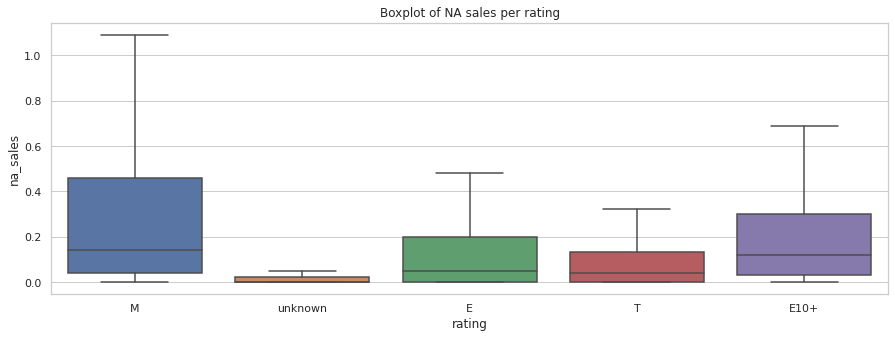

In [58]:
fig, axes = plt.subplots(figsize=(15, 5))
ax=sns.boxplot(x='rating', y='na_sales', data=data_filtered,showfliers = False)
plt.title('Boxplot of NA sales per rating')
plt.show()

The NA region profile:

- The most popular platform for this profile is the PS4, its followed by XOne and X360.

- The majority of this profile sales are on games in the Action and Shooter genre.

- The ratings of its popular games are rated M.


-----------------

**EU region profile**

- Top 5 platforms in EU region

In [59]:
eu_platform_profile = data_filtered.groupby(['platform'])['total_sales','eu_sales'].sum().sort_values(by='eu_sales',ascending=False)
eu_platform_profile.head(5)

,total_sales,eu_sales
platform,,
PS4,314.14,141.09
PS3,181.43,67.81
XOne,159.32,51.59
X360,136.80,42.52
3DS,143.25,30.96


- Top 5 genres in EU region

In [60]:
eu_genre_profile = data_filtered.groupby(['genre'])['total_sales','eu_sales'].sum().sort_values(by='eu_sales',ascending=False)
eu_genre_profile.head(5)

,total_sales,eu_sales
genre,,
Action,321.87,118.13
Shooter,232.98,87.86
Sports,150.65,60.52
Role-Playing,145.89,36.97
Racing,39.89,20.19


- What ratings are at the top of the sales in the EU region 

In [61]:
eu_rating_profile = data_filtered.groupby(['rating'])['total_sales','eu_sales'].sum().sort_values(by='eu_sales',ascending=False)
eu_rating_profile.head(5)

,total_sales,eu_sales
rating,,
M,371.68,145.32
E,200.16,83.36
unknown,276.84,78.91
E10+,115.39,42.69
T,126.62,41.95


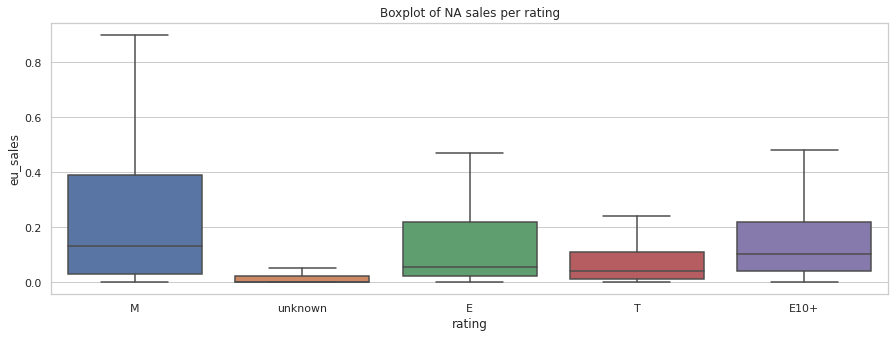

In [62]:
fig, axes = plt.subplots(figsize=(15, 5))
ax=sns.boxplot(x='rating', y='eu_sales', data=data_filtered,showfliers = False)
plt.title('Boxplot of NA sales per rating')
plt.show()

The EU region profile:

- The most popular platform for this profile is the PS4, its followed by PS3 and XOne.

- The majority of this profile sales are on games in the Action and Shooter genre.

- The ratings of its popular games are rated M.

NA and EU profiles are very similiar in all selected parametes.

**JP region profile**

- Top 5 platforms in JP region

In [63]:
jp_platform_profile = data_filtered.groupby(['platform'])['total_sales','jp_sales'].sum().sort_values(by='jp_sales',ascending=False)
jp_platform_profile.head(5)

,total_sales,jp_sales
platform,,
3DS,143.25,67.81
PS3,181.43,23.35
PSV,32.99,18.59
PS4,314.14,15.96
WiiU,64.63,10.88


- Top 5 genres in JP region

In [64]:
jp_genre_profile = data_filtered.groupby(['genre'])['total_sales','jp_sales'].sum().sort_values(by='jp_sales',ascending=False)
jp_genre_profile.head(5)

,total_sales,jp_sales
genre,,
Role-Playing,145.89,51.04
Action,321.87,40.49
Misc,62.82,9.20
Fighting,35.31,7.65
Shooter,232.98,6.61


- What ratings are at the top of the sales in the EU region 

In [65]:
jp_rating_profile = data_filtered.groupby(['rating'])['total_sales','jp_sales'].sum().sort_values(by='jp_sales',ascending=False)
jp_rating_profile

,total_sales,jp_sales
rating,,
unknown,276.84,85.05
T,126.62,20.59
E,200.16,15.14
M,371.68,14.11
E10+,115.39,5.89


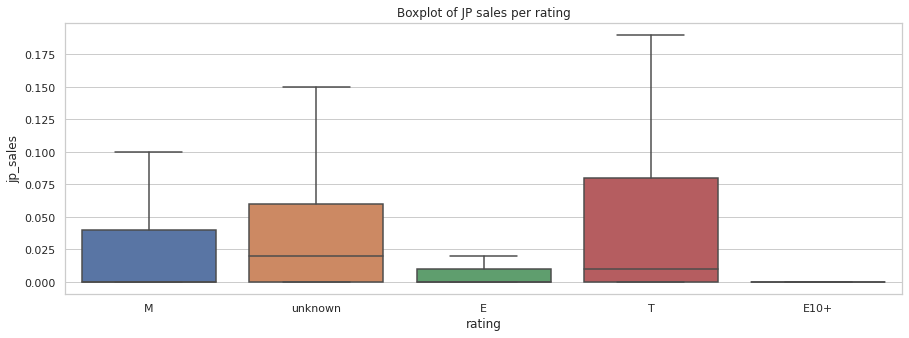

In [66]:
fig, axes = plt.subplots(figsize=(15, 5))
ax=sns.boxplot(x='rating', y='jp_sales', data=data_filtered,showfliers = False)
plt.title('Boxplot of JP sales per rating')
plt.show()

The JP region profile:

- The most popular platform for this profile is the 3DS and is foloowed by PS3.

- The majority of this profile sales are on games in the Role-Playing and Action genre.

- Theres a high amoiunt of unknown values in the rating column that cound indicate a different rating system for the games.

- The ratings of its popular games are rated T.

This profile is very different from the other 2. Not accounting for its smaller sales share it varies in all the selected parameters from the other profiles. 

**Step overview**

In this step we made a user profile for the regions: NA, UN and JP.

After comparing between the 3 user profiles in dataframes and boxplots we came to the conclutions that:

- NA and UE profiles are similar in genre preferences, Action and Shooter, and ESRB ratings, M, for their games.
- NA and UE also prefer the PS4 platform.
- JP profile is differnt from NA and UE in everything as it prefets the 3DS platform and Role-Playing games for T ESRB rating.
- Japan has noticebly high number of unknown values in the genre column when compared to the other region. it could suggest a different rating system of games unique for this region.  

--------------

# Step 5 - Test the following hypotheses:


- In this step we itend to check:

**—Average user ratings of the Xbox One and PC platforms are the same.**

**—Average user ratings for the Action and Sports genres are different.**

- the alpha threshold value for this hypothesis is 0.05.

**Procedure**

 - For the first hypothesis:

    H0: Average user ratings of the Xbox One platform equal to Average user ratings of the  PC platform.

    H1:  Average user ratings of the Xbox One platform is not equal to Average user ratings of the  PC platform.
    
1) We will seperate the user rating values from the dataframes to test out our hypothesis of them.

2) We will compare the user ratings of this 2 different platform by using t-test.

3) Presenting findings.


  - For the second hypothesis:

    H0: Average user ratings for the Action genre are not different from the Average user ratings for the Sports genre.

    H1: Average user ratings for the Action genre are different from the Average user ratings for the Sports genre.
       
1) We will seperate the user rating values from the dataframes to test out our hypothesis of them.

2) We will compare the user ratings of this 2 different genres by using t-test.

3) Presenting findings.

--------------------

**First Hypothesis**

H0: Average user ratings of the Xbox One platform equal to Average user ratings of the PC platform.

H1: Average user ratings of the Xbox One platform is not equal to Average user ratings of the PC platform.

1) seperating the data we need from the dataframe:

In [67]:
xone = data[(data.platform == 'XOne')  & (data.user_score.notna())]['user_score'].astype(float)
pc = data[(data.platform == 'PC')  & (data.user_score.notna())]['user_score'].astype(float)

alpha = 0.05

In [68]:
xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

we will condunt a levene test in order to test the assumption of whether the equality of the 2 variances is valid 

In [69]:
stat, p = levene(xone, pc)
p<0.05

False

2) We will compare the user ratings of this 2 different platform by using t-test.

In [70]:
first_result = stats.ttest_ind(xone, pc,equal_var=False)

In [71]:
if first_result.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


3) Presenting findings.

In [72]:
print(xone.mean())
print(pc.mean())

6.521428571428572
7.065960264900661


After running our data sample through a t-test with a statistical significance level of 0.05 our hypothesis on the Equality of the Means of Paired Samples was that we reject the Null Hypothesis as and the Average user ratings of the Xbox One platform not equal to Average user ratings of the PC platform withing 95% of the selected sample.

--------------------

**The second hypothesis:**

H0: Average user ratings for the Action genre are not different from the Average user ratings for the Sports genre.

H1: Average user ratings for the Action genre are different from the Average user ratings for the Sports genre.

1) seperating the data we need from the dataframe:

In [73]:
action = data[(data['genre'] == 'Action') & (data.user_score.notna())]['user_score'].astype(float)

sports = data[(data['genre'] == 'Sports') & (data.user_score.notna())]['user_score'].astype(float)

alpha = 0.05

we will condunt a levene test in order to test the assumption of whether the equality of the 2 variances is valid 

In [74]:
stat, p = levene(action, sports)
p<0.05

True

2) We will compare the user ratings of this 2 different platform by using t-test.

In [75]:
second_result = stats.ttest_ind(action, sports,equal_var=True)

In [76]:
if first_result.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


3) Presenting findings.

In [77]:
print(action.mean())
print(sports.mean())

7.058129175946549
6.951433857539316


After running our data sample through a t-test with a statistical significance level of 0.05 our hypothesis on the Equality of the Means of Paired Samples was that we reject the Null Hypothesis as and the Average user ratings of the Action genre are not equal to Average user ratings of the sports genre withing 95% of the selected sample.

# Step 6 - Write a general conclusion

In this project we were assigned with a dataset that covers historical game sales from an open source.
our tast was to dentify patterns that determine whether a game succeeds or not in order to allow us to spot potential big winners and plan advertising campaigns for the upcomingyeaer of 2017.

After analysing and observing the data we conducted several conclutions that we devived in 5 steps. 

**Genreal conclutions**

- conclutions of step 1 

In this step we took a first look at the data. The data consisted of 16715 and 11 columns.
There was a large amount of missing values in certain column that some of them we couldnt ommit because of their significant amount.


- conclutions of step 2

In this step we replaced the column names to lower letters in order to allign the sanalysis with the right format.
We then dealt with missing values in the columns [name],[genre] and [year_of_release].
In many columns we didnt change or ommit any missing values in the score column because of their large amount and our innability to replace the missing values.
We changed the TBD value to NaN in the columns [year_of_release] and [user_score] in order to remove all the string from those columns and change the types of the columns.
We cteated a new column that calculates the total sales of each game, we called it [total_sales].

- conclutions of step 3 

In this step on Exploratory data analysis we gathered a good amlint of indormation regarding our data.
We Looked at how many games were released in different years and It seems that in 2008 and 2009 there was the biggest amount of games, 1427 and 1426, that was ever made by 2016.


We noticed that the data started growing noticably at 1994, before that there were less that annual 100 games and after 1994 that number of games that were released annualy started jumping and at times doubling themselves each year.
 After 2008, there was a declining trend of game releases per year that stabilized beetween 500-600 games in the last years of 2013 to 2016. 


In all of the graphs of our platforms there was a visible distribution of ascending and gradually descending in the period of 10 years. For example, PS2 used to be the most popular platform in the early 2000 as its distibuiton seemed to be the most stable troughout the years until it reached a plateau between 02 to 06 and standed as the most popular platform of that time.


By 2005, XBOX-360 came out and then at 2006 Wii and PS3 came out and started gaining popularity. Gradualy, sales of PS2 started going down and by 2010 XBOX-360 sales were now declining and hinting that there were another platform that was gaining popularity, which was the PS3.
Then we saw that the lifetime of our leading platforms are about 10 years and it reaches its peak in terms of profit in its midlife, about 5-6 yers, we knew that the median lifetime of a platform is 6 years but as we seen in our data it takes 4 to 6 years to reach its profit limit for leading platforms. So we filtered the data to a minimum year of 2013 in order to target any platform that are on the rise and could be profitable in 2017.


Afrer we excluded platfoms that have outdated their profit limit in order to focus from now on only on platforms that can still be on the rise by 2017. Overall, the difference in sales was significant and the only profitable platforms that were presented in the data were XBOX360, PS4, XOne and Wii.


The platform with the highest total sales average in the data was XBOX360 but we already know that this platform is gradually declining. contrary, Wii platform exhibits high boundaries but a relatively low average point. The platform we were most iterested in were PS4 and XOne which seemed to have smaller boundaries but relatively average points and outliers.

Overall, the difference in sales were significant and the only profitable platforms that are presented in the boxplot were XBOX360, PS4, XOne and Wii.

The platforms we are only interested in, PS4 and XOne, which resambled eachother troughout the data and in their quartile values. The average value of XOne was higher then the PS4 average but the the quartile range of PS4 is slighlty bogger than XOne.

Interestingly There was a correlation between critic_score and total_sales. Which suggeted that professional reviews do have an affect on the total sales of games for the platforms we chose. but user reviews had no correlation to total sales atall.

After looking the the data through boxplot graphs comparing total sales and genres We can say that the most popular and profitable genre of the games is Action genre in terms of game releases and in total sales.
The second most released game genres were role-playing and adventure but in terms of profit the socond highest is shooter genre that is followed by Sports, eventhough shooter genre is 5th and Sports genre is the 4th in game releases.

concluding the data we observed through these graphs we suggest that the genres sport and Shooter are the most profit potential among the genres as they do not have a high game count but a high profit.

- conclutions of step 4

In this step we made a user profile for the regions: NA, UN and JP.

After comparing between the 3 user profiles in dataframes and boxplots we came to the conclutions that:

-NA and UE profiles are similar in genre preferences, Action and Shooter, and ESRB ratings, M, for their games.

-NA and UE also prefer the PS4 platform.

-JP profile is differnt from NA and UE in everything as it prefets the 3DS platform and Role-Playing games for T ESRB rating. 

- conclutions of step 5

For the first hypothesis : Average user ratings of the Xbox One and PC platforms are the same.

After running our data sample through a t-test with a statistical significance level of 0.05 our hypothesis on the Equality of the Means of Paired Samples was that we reject the Null Hypothesis as and the Average user ratings of the Xbox One platform not equal to Average user ratings of the PC platform withing 95% of the selected sample.

For the seconf hypothesis: Average user ratings for the Action and Sports genres are different.

After running our data sample through a t-test with a statistical significance level of 0.05 our hypothesis on the Equality of the Means of Paired Samples was that we reject the Null Hypothesis as and the Average user ratings of the Action genre are not equal to Average user ratings of the sports genre withing 95% of the selected sample.